In [1]:
import numpy as np
import xarray as xr
import netCDF4 as nc
import pandas as pd
import ES3 
from datetime import datetime
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import os

In [2]:
def estatisticas(dado_boia, results_modelo):
    """
    Calcula as estatisticas dos resultados do modelo
    dado_boia = coluna com dados da boia do dataframe (a priori, hs)
    result_modelo = coluna com resultados do modelo do dataframe (a priori, hs)
    """

    corr = dado_boia.corr(results_modelo)  # modelo e dado
    bias = np.mean(results_modelo-dado_boia)  # modelo e dado
    rmse = np.sqrt(np.sum((results_modelo - dado_boia)**2) /len(dado_boia))  # modelo e dado
    si = rmse/np.mean(dado_boia)  # dado
    N = len(dado_boia.dropna())  
    
    return corr, bias, rmse,  si,  N

In [3]:
df_era = pd.DataFrame()
era5_path = os.getcwd() + '/era5'
files = os.listdir(era5_path)
files.sort()
for i in files:
    ds = xr.open_dataset(era5_path + '/' + i)
    df = ds.sel(longitude=-43, latitude=-23).to_dataframe()
    df.pop('latitude')
    df.pop('longitude')
    df_era = df_era.append(df)

In [4]:
boia1 = ES3.trata_dado('dados/SIMCOSTA_RJ-1_OCEAN_2015-07-29_2016-10-13.csv')
boia1.columns = ['Hs1', 'Tp1', 'Dir1', 'DirN1', 'Decl1']

In [5]:
boia2 = ES3.trata_dado('dados/SIMCOSTA_RJ-2_OCEAN_2015-07-29_2016-12-20.csv')
boia2.columns = ['Hs2', 'Tp2', 'Dir2', 'DirN2', 'Decl2']

In [6]:
boia3 = ES3.trata_dado('dados/SIMCOSTA_RJ-3_OCEAN_2016-07-14_2022-01-26.csv')
boia3.columns = ['Hs3', 'Tp3,', 'Dir3', 'DirN3', 'Decl3']
boia3 = boia3[:'2021-12-31']

In [7]:
boia4 = ES3.trata_dado('dados/SIMCOSTA_RJ-4_OCEAN_2017-08-28_2022-01-25.csv')
boia4.columns = ['Hs4', 'Tp4', 'Dir4', 'DirN4', 'Decl4']
boia4 = boia4[:'2021-12-31']

In [8]:
geral = pd.concat([boia1, boia2, boia3, boia4, df_era], axis=1)

In [9]:
geral_treated = geral.resample('1H').mean()

In [10]:
geral_treated['Hs1'].index[0]

Timestamp('1979-01-01 00:00:00', freq='H')

In [11]:
hss = ['Hs1', 'Hs2', 'Hs3', 'Hs4']

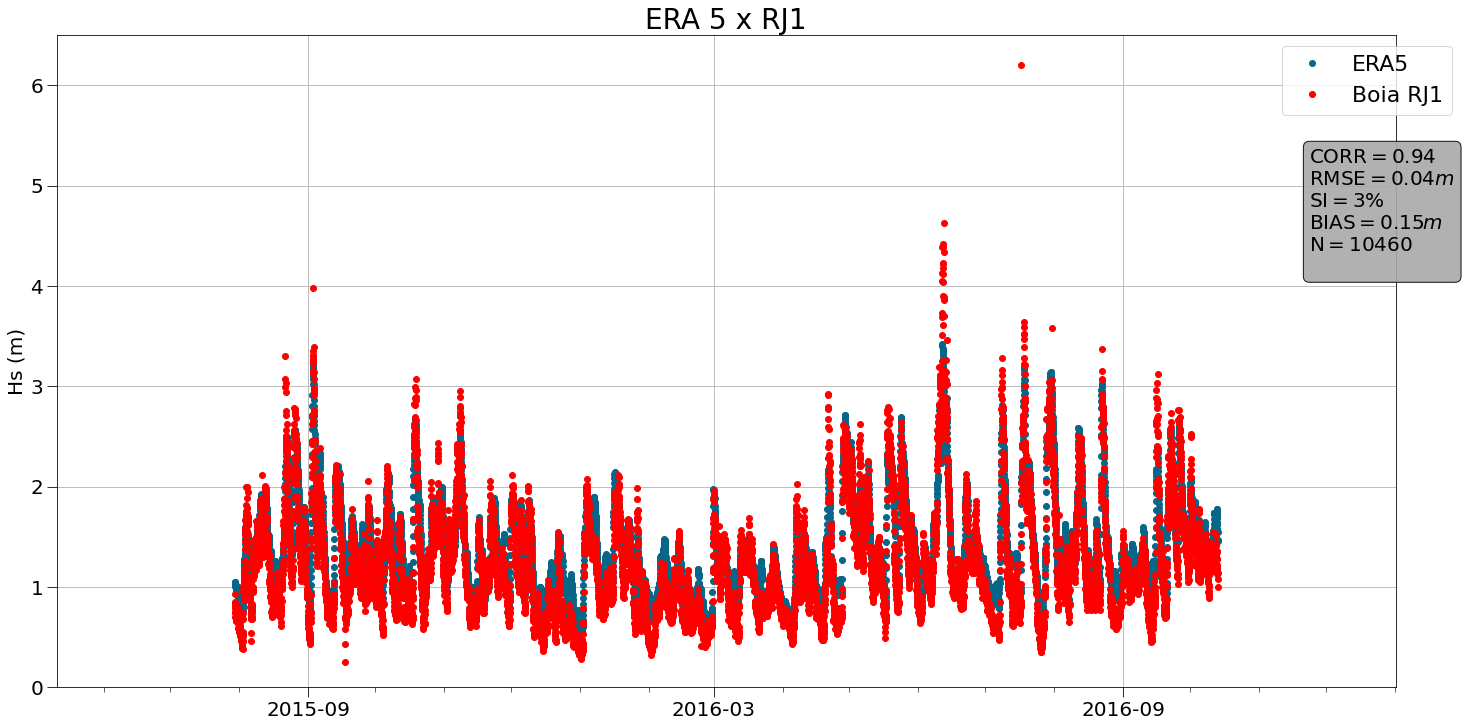

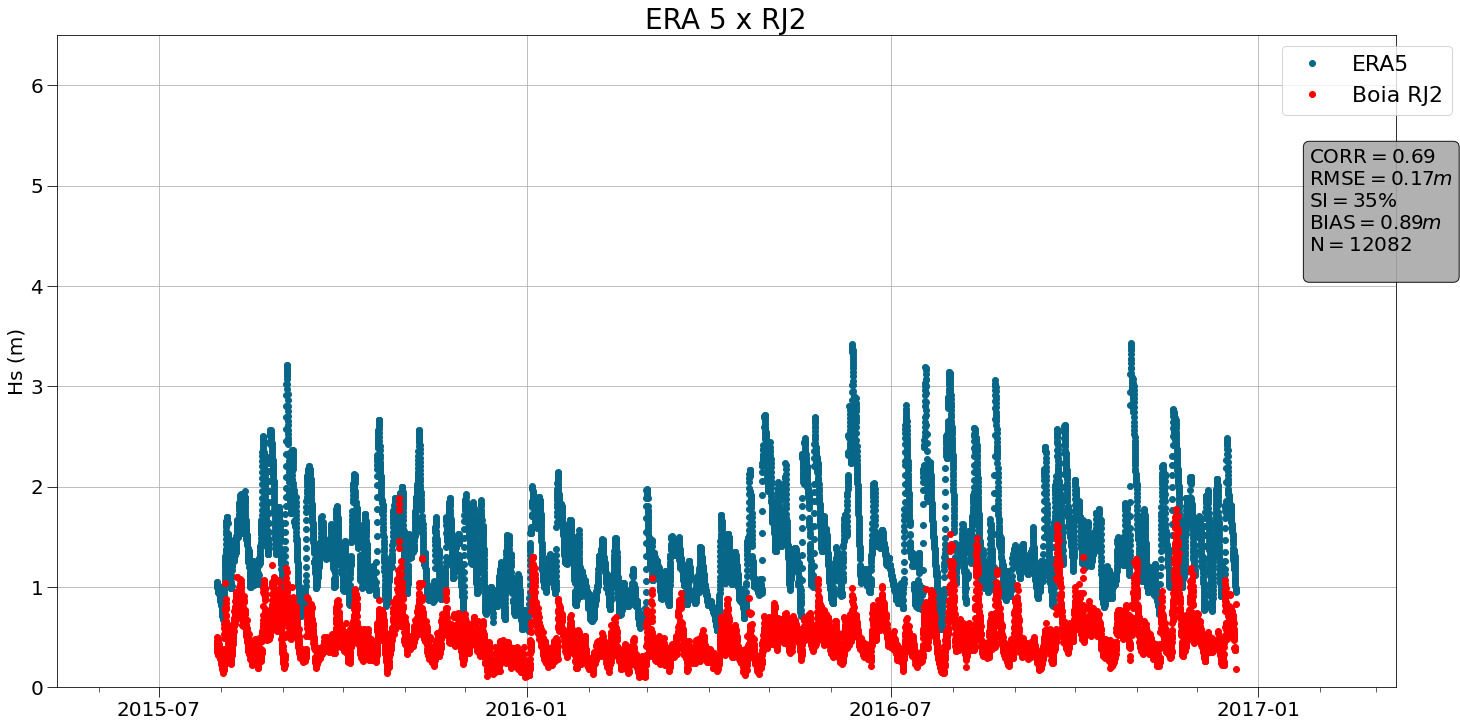

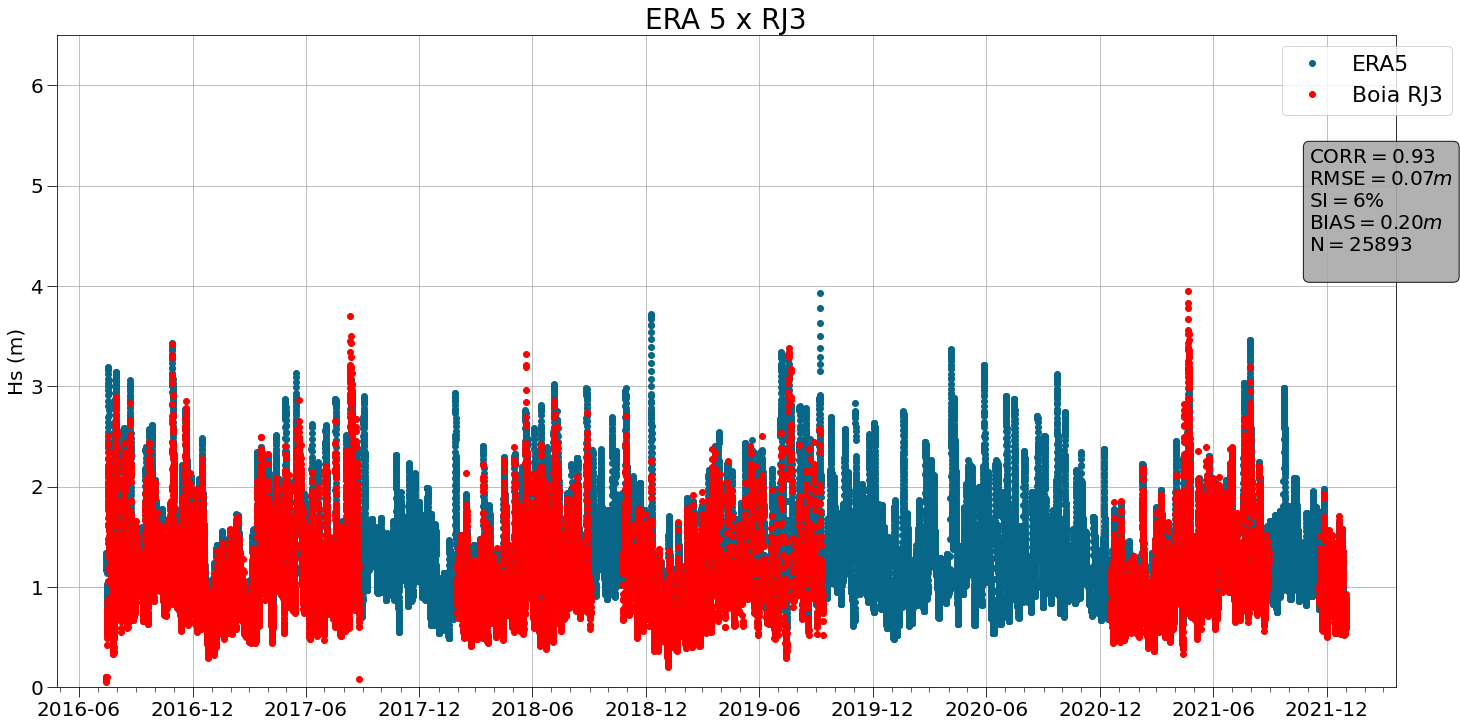

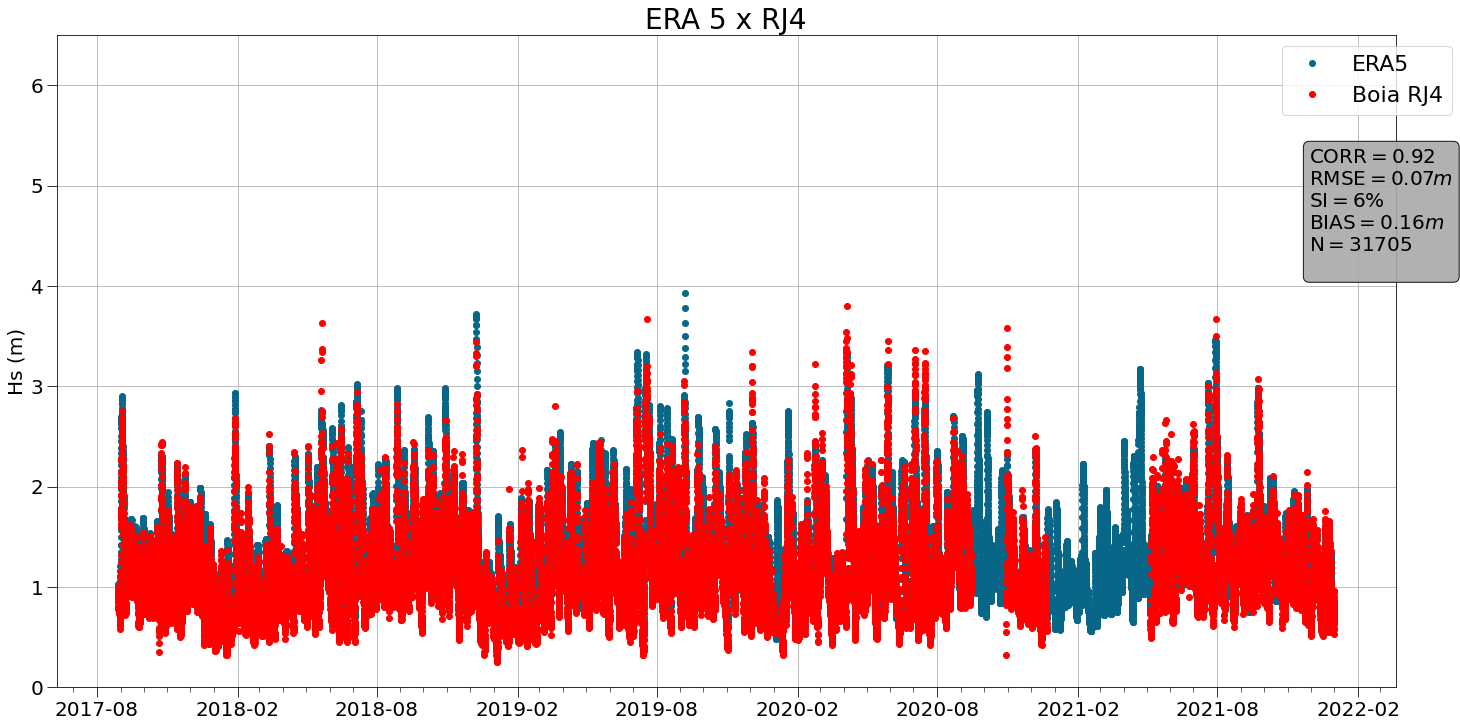

In [12]:
hss = ['Hs1', 'Hs2', 'Hs3', 'Hs4']

import os
figpath = os.getcwd()+'/fig/'

from datetime import timedelta

for i in hss:
    hsera5 = geral_treated['swh'][geral_treated[i].dropna().index[0]: geral_treated[i].dropna().index[-1]]
    
    fig = plt.figure(figsize=(24,12))

    ax = fig.add_subplot(111)
    ax.plot(hsera5, marker = 'o', color = '#086788', linestyle = 'none', label = 'ERA5')
    ax.plot(geral_treated[i], marker = 'o', color = 'red', linestyle = 'none', label='Boia RJ'+i[2])


    ax.grid()
    ax.set_ylabel('Hs (m)', fontsize = 20)

    ################################# data #######################

    # Major ticks every 6 months.
    fmt_half_year = mdates.MonthLocator(interval=6)
    ax.xaxis.set_major_locator(fmt_half_year)

    # Minor ticks every month.
    fmt_month = mdates.MonthLocator()
    ax.xaxis.set_minor_locator(fmt_month)

    # Text in the x axis will be displayed in 'YYYY-mm' format.
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))


    ax.tick_params(axis='both', which='major', labelsize=20, size=10)
    ax.tick_params(axis='both', which='minor', size=5)

    ax.set_ylim(0,6.5)
    
    ax.set_xlim(geral_treated[i].dropna().index[0] -timedelta(days=80) , geral_treated[i].dropna().index[-1] + timedelta(days=80))
    # ax.set_xlim(1,12)
    ax.legend(fontsize = 22, bbox_to_anchor=(1.05, 1))

    ###########################################################################

    plt.title('ERA 5 x RJ' + i[2], fontsize = 28)
    
    
    #################### METRICAS ESTATISTICAS ###################
    
    
    CORR, BIAS, RMSE, SI, N = estatisticas(geral_treated[i], geral_treated['swh'])
    
    
    textstr = '$\mathrm{CORR}=%.2f$\n$\mathrm{RMSE}=%.2f  m$\n$\mathrm{SI}=%.0f \%%$\n$\mathrm{BIAS}=%.2f m$\n$\mathrm{N}=%.0f$\n ' % (
    CORR, RMSE, SI*100, BIAS, N)
# Caracteristicas da caixa de texto
    props = dict(boxstyle='round', facecolor='darkgray', alpha=0.9)
    # ax.text(hsera5.index[int(len(geral_treated[i].dropna())/2)], 5.5, textstr, fontsize=20,
    #      verticalalignment='top', bbox=props)  # Unindo caixa e texto
    trans = fig.transFigure
    plt.text(0.85,0.75 , textstr, transform=trans, fontsize=20,
          verticalalignment='top', bbox=props)  # Unindo caixa e texto

    plt.savefig(figpath+'compara_era5_rj'+i[2]+'.png')

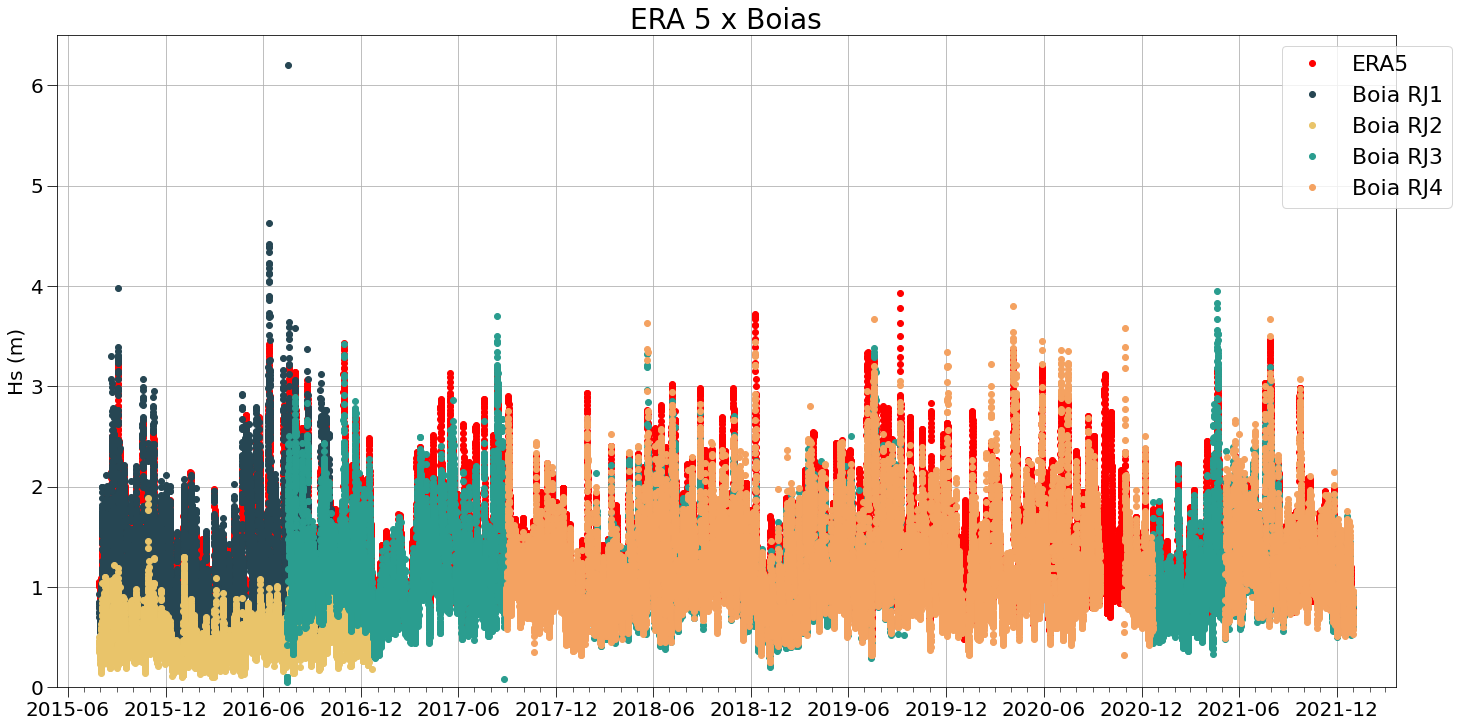

In [13]:

hsera5 = geral_treated['swh'][geral_treated['Hs1'].dropna().index[0]: geral_treated['Hs4'].dropna().index[-1]]

fig = plt.figure(figsize=(24,12))

ax = fig.add_subplot(111)
ax.plot(hsera5, marker = 'o', color = 'red', linestyle = 'none', label = 'ERA5')
ax.plot(geral_treated['Hs1'], marker = 'o', color = '#264653', linestyle = 'none', label='Boia RJ1')
ax.plot(geral_treated['Hs2'], marker = 'o', color = '#e9c46a', linestyle = 'none', label='Boia RJ2')
ax.plot(geral_treated['Hs3'], marker = 'o', color = '#2a9d8f', linestyle = 'none', label='Boia RJ3')
ax.plot(geral_treated['Hs4'], marker = 'o', color = '#f4a261', linestyle = 'none', label='Boia RJ4')




ax.grid()
ax.set_ylabel('Hs (m)', fontsize = 20)

################################# data #######################

# Major ticks every 6 months.
fmt_half_year = mdates.MonthLocator(interval=6)
ax.xaxis.set_major_locator(fmt_half_year)

# Minor ticks every month.
fmt_month = mdates.MonthLocator()
ax.xaxis.set_minor_locator(fmt_month)

# Text in the x axis will be displayed in 'YYYY-mm' format.
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))


ax.tick_params(axis='both', which='major', labelsize=20, size=10)
ax.tick_params(axis='both', which='minor', size=5)

ax.set_ylim(0,6.5)

ax.set_xlim(geral_treated['Hs1'].dropna().index[0] -timedelta(days=80) , geral_treated['Hs4'].dropna().index[-1] + timedelta(days=80))
# ax.set_xlim(1,12)
ax.legend(fontsize = 22, bbox_to_anchor=(1.05, 1))

###########################################################################

plt.title('ERA 5 x Boias', fontsize = 28)



plt.savefig(figpath+'compara_era5_boias.png')

# Fazendo a comparacao do ERA5 agora

In [14]:
arr_douglas = []
arr_cond = []
arr_risco = []
arr_criti = []

lims_douglas = [(-1,0), (0,0.1), (0.1, 0.5), (0.5, 1.25), (1.25,2.5),(2.5,4),(4,6),(6,9),(9,14),(14,100)] # limites escala douglas
niveis_douglas = ['calmo', 'encrespado', 'suave', 'fraco', 'moderado', 'grosso', 'muito grosso',
          'alto', 'muito alto', 'fenomenal']

lims_cond = [(0,0.5),(0.5,1.5),(1.5,2.5),(2.5,100)]
niveis_cond = ['calmo_cond','fraco_cond','moderado_cond','forte_cond']

lims_risco = [(0,1.5),(1.5,2),(2,2.5),(2.5,100)]
niveis_risco = ['-','baixo_risco','moderado_risco','alto_risco']

lims_criti = [(0,2),(2,2.5),(2.5,3.5),(3.5,100)]
niveis_criti = ['normalidade','mobilizacao','atencao','alerta']


for i in lims_douglas:
    arr_douglas.append(df_era['swh'].between(i[0],i[1]))
    
for j,k,l in zip(lims_cond,lims_risco,lims_criti):
    arr_cond.append(df_era['swh'].between(j[0],j[1]))
    arr_risco.append(df_era['swh'].between(k[0],k[1]))
    arr_criti.append(df_era['swh'].between(l[0],l[1]))


for i,j in zip(arr_douglas, niveis_douglas):
    df_era[j] = i
    
for i,j in zip(arr_cond, niveis_cond):
    df_era[j] = i
    
for i,j in zip(arr_risco, niveis_risco):
    df_era[j] = i
    
for i,j in zip(arr_criti, niveis_criti):
    df_era[j] = i
    
    
        

In [15]:
verao = df_era[(df_era.index.month<4)]
outono = df_era[(df_era.index.month>3) & (df_era.index.month<7)]
inverno = primavera = df_era[(df_era.index.month>6) & (df_era.index.month<10)]
primavera = df_era[(df_era.index.month>9)]

# Fazendo Histogramas

In [16]:
niveis_douglas_tudo_arr = []
niveis_cond_tudo_arr = []
niveis_risco_tudo_arr = []
niveis_criti_tudo_arr = []

for i in niveis_douglas:
    niveis_douglas_tudo_arr.append(df_era[i][df_era[i]==True].count())
    
for i in niveis_cond:
    niveis_cond_tudo_arr.append(df_era[i][df_era[i]==True].count())
    
for i in niveis_risco:
    niveis_risco_tudo_arr.append(df_era[i][df_era[i]==True].count())

for i in niveis_criti:
    niveis_criti_tudo_arr.append(df_era[i][df_era[i]==True].count())    


In [17]:
niveis_douglas_verao_arr = []
niveis_cond_verao_arr = []
niveis_risco_verao_arr = []
niveis_criti_verao_arr = []

for i in niveis_douglas:
    niveis_douglas_verao_arr.append(verao[i][verao[i]==True].count())
    
for i in niveis_cond:
    niveis_cond_verao_arr.append(verao[i][verao[i]==True].count())
    
for i in niveis_risco:
    niveis_risco_verao_arr.append(verao[i][verao[i]==True].count())

for i in niveis_criti:
    niveis_criti_verao_arr.append(verao[i][verao[i]==True].count())    


In [18]:
niveis_douglas_outono_arr = []
niveis_cond_outono_arr = []
niveis_risco_outono_arr = []
niveis_criti_outono_arr = []

for i in niveis_douglas:
    niveis_douglas_outono_arr.append(outono[i][outono[i]==True].count())
    
for i in niveis_cond:
    niveis_cond_outono_arr.append(outono[i][outono[i]==True].count())
    
for i in niveis_risco:
    niveis_risco_outono_arr.append(outono[i][outono[i]==True].count())

for i in niveis_criti:
    niveis_criti_outono_arr.append(outono[i][outono[i]==True].count())    


In [19]:
niveis_douglas_inverno_arr = []
niveis_cond_inverno_arr = []
niveis_risco_inverno_arr = []
niveis_criti_inverno_arr = []

for i in niveis_douglas:
    niveis_douglas_inverno_arr.append(inverno[i][inverno[i]==True].count())
    
for i in niveis_cond:
    niveis_cond_inverno_arr.append(inverno[i][inverno[i]==True].count())
    
for i in niveis_risco:
    niveis_risco_inverno_arr.append(inverno[i][inverno[i]==True].count())

for i in niveis_criti:
    niveis_criti_inverno_arr.append(inverno[i][inverno[i]==True].count())    


In [20]:
niveis_douglas_primavera_arr = []
niveis_cond_primavera_arr = []
niveis_risco_primavera_arr = []
niveis_criti_primavera_arr = []

for i in niveis_douglas:
    niveis_douglas_primavera_arr.append(primavera[i][primavera[i]==True].count())
    
for i in niveis_cond:
    niveis_cond_primavera_arr.append(primavera[i][primavera[i]==True].count())
    
for i in niveis_risco:
    niveis_risco_primavera_arr.append(primavera[i][primavera[i]==True].count())

for i in niveis_criti:
    niveis_criti_primavera_arr.append(primavera[i][primavera[i]==True].count())    


In [21]:
def plota_histograma_douglas(estacao):

    if estacao == 'verao':
        arr = niveis_douglas_verao_arr
        nome_estacao = 'o Verão'
    elif estacao == 'outono':
        arr = niveis_douglas_outono_arr
        nome_estacao = 'o Outono'
    elif estacao == 'inverno':
        arr = niveis_douglas_inverno_arr
        nome_estacao = 'o Inverno'
    elif estacao == 'tudo':
        arr = niveis_douglas_tudo_arr
        nome_estacao = 'o período total'
    else:
        arr = niveis_douglas_primavera_arr
        nome_estacao = 'a Primavera'
    
    
    niveis_douglas = ['Calmo','Encrespado','Suave','Fraco', 'Moderado','Grosso',
         'Muito grosso', 'Alto', 'Muito alto','Fenomenal']
    
    fig, ax = plt.subplots(figsize = (16,6))
    ax.bar(niveis_douglas, height=arr)
    ax.grid()
    ax.set_yscale('log')
    ax.set_ylim(1,10**5.5)
    ax.set_title('Ocorrência dos Níveis da escala douglas para ' + nome_estacao)

    plt.savefig(figpath + 'histograma_douglas_'+estacao+'.png')

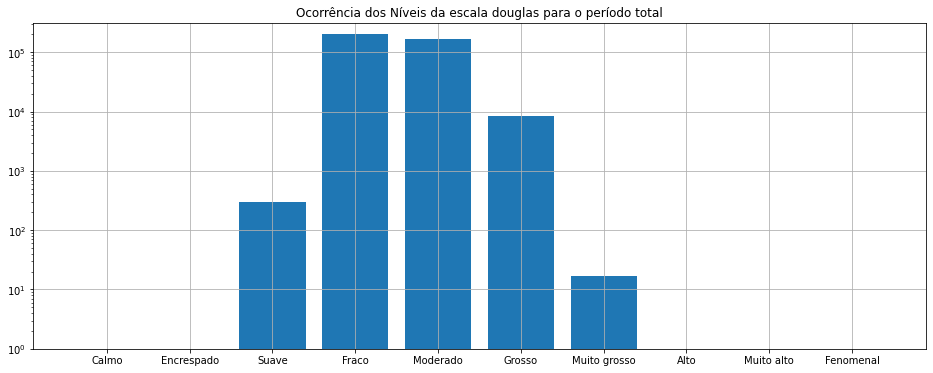

In [22]:
plota_histograma_douglas('tudo')

In [23]:
def plota_histograma_cond(estacao):
    if estacao == 'verao':
        arr = niveis_cond_verao_arr
        nome_estacao = 'o Verão'
    elif estacao == 'outono':
        arr = niveis_cond_outono_arr
        nome_estacao = 'o Outono'
    elif estacao == 'inverno':
        arr = niveis_cond_inverno_arr
        nome_estacao = 'o Inverno'
    elif estacao == 'tudo':
        arr = niveis_cond_tudo_arr
        nome_estacao = 'o período total'
    else:
        arr = niveis_cond_primavera_arr
        nome_estacao = 'a Primavera'
    
    niveis_cond = ['Calmo','Fraco','Moderado','Forte']
    
    fig, ax = plt.subplots(figsize = (16,6))
    ax.bar(niveis_cond, height=arr)
    ax.grid()
    ax.set_yscale('log')
    ax.set_ylim(1,10**5.5)
    ax.set_title('Ocorrência dos Níveis da escala de Condição do Mar para ' + nome_estacao)
    
    plt.savefig(figpath + 'histograma_cond_'+estacao+'.png')

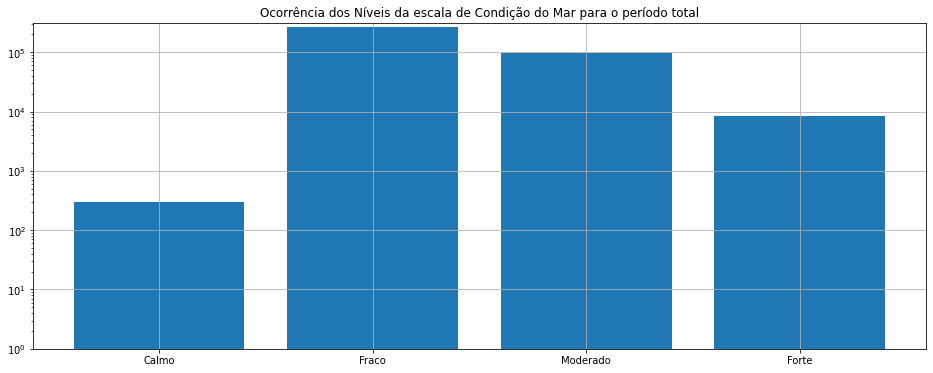

In [24]:
plota_histograma_cond('tudo')

In [25]:
def plota_histograma_risco(estacao):
    if estacao == 'verao':
        arr = niveis_risco_verao_arr
        nome_estacao = 'o Verão'
    elif estacao == 'outono':
        arr = niveis_risco_outono_arr
        nome_estacao = 'o Outono'
    elif estacao == 'inverno':
        arr = niveis_risco_inverno_arr
        nome_estacao = 'o Inverno'
    elif estacao == 'tudo':
        arr = niveis_risco_tudo_arr
        nome_estacao = 'o período total'
    else:
        arr = niveis_risco_primavera_arr
        nome_estacao = 'a Primavera'
    
    niveis_risco = ['-', 'Baixo', 'Moderado', 'Alto']
    
    fig, ax = plt.subplots(figsize = (16,6))
    ax.bar(niveis_risco, height=arr)
    ax.grid()
    ax.set_yscale('log')
    ax.set_ylim(1,10**5.5)
    ax.set_title('Ocorrência dos Níveis da escala de Risco para ' + nome_estacao)
    
    plt.savefig(figpath + 'histograma_risco_'+estacao+'.png')

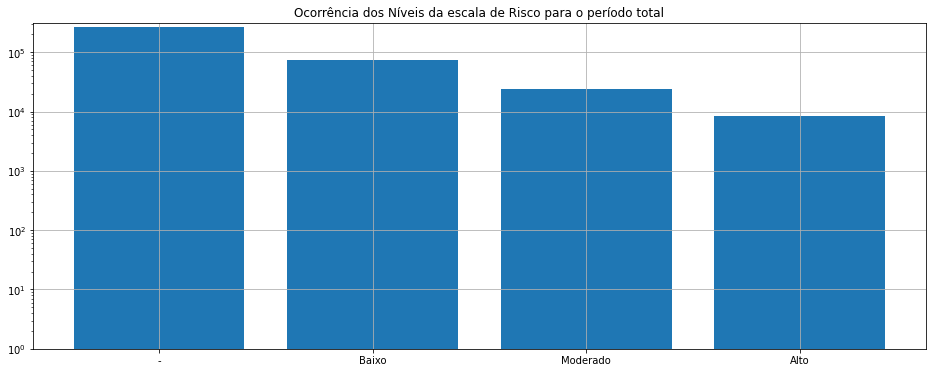

In [26]:
plota_histograma_risco('tudo')

In [27]:
def plota_histograma_criti(estacao):
    if estacao == 'verao':
        arr = niveis_criti_verao_arr
        nome_estacao = 'o Verão'
    elif estacao == 'outono':
        arr = niveis_criti_outono_arr
        nome_estacao = 'o Outono'
    elif estacao == 'inverno':
        arr = niveis_criti_inverno_arr
        nome_estacao = 'o Inverno'
    elif estacao == 'tudo':
        arr = niveis_criti_tudo_arr
        nome_estacao = 'o período total'
    else:
        arr = niveis_criti_primavera_arr
        nome_estacao = 'a Primavera'
    
    
    niveis_criti = ['Normalidade', 'Mobilização', 'Atenção', 'Alerta']
    
    fig, ax = plt.subplots(figsize = (16,6))
    ax.bar(niveis_criti, height=arr)
    ax.grid()
    ax.set_yscale('log')
    ax.set_ylim(1,10**5.6)
    ax.set_title('Ocorrência dos Níveis da escala de Criticidade para ' + nome_estacao)
    
    plt.savefig(figpath + 'histograma_criti_'+estacao+'.png')

In [ ]:
x = niveis_douglas = ['Calmo','Encrespado','Suave','Fraco', 'Moderado','Grosso',
         'Muito grosso', 'Alto', 'Muito alto','Fenomenal']
    
x_axis = np.arange(len(x))

fig, ax = plt.subplots(figsize = (18,6))

ax.bar(x_axis-0.3, niveis_douglas_verao_arr, 0.2, label = 'Verão', color='#F7D716')
ax.bar(x_axis-0.1, niveis_douglas_outono_arr, 0.2, label = 'Outono', color='#CC9C75')
ax.bar(x_axis+0.1, niveis_douglas_inverno_arr, 0.2, label = 'Inverno', color='#293462')
ax.bar(x_axis+0.3, niveis_douglas_primavera_arr, 0.2, label = 'Primavera', color='#F24C4C')

ax.set_xticks(x_axis, x)
ax.legend()
ax.grid()
ax.set_yscale('log')
ax.set_ylim(1,10**5.6)
ax.set_title('Ocorrência dos Níveis da escala Douglas separado sazonalmente')

plt.savefig(figpath + 'histograma_douglas_sazonal.png')

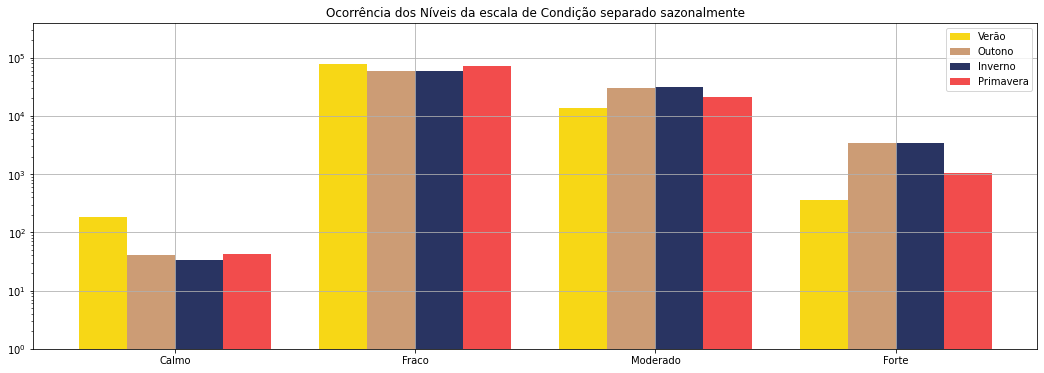

In [69]:
x = niveis_cond = ['Calmo','Fraco','Moderado','Forte']
x_axis = np.arange(len(x))

fig, ax = plt.subplots(figsize = (18,6))

ax.bar(x_axis-0.3, niveis_cond_verao_arr, 0.2, label = 'Verão', color='#F7D716')
ax.bar(x_axis-0.1, niveis_cond_outono_arr, 0.2, label = 'Outono', color='#CC9C75')
ax.bar(x_axis+0.1, niveis_cond_inverno_arr, 0.2, label = 'Inverno', color='#293462')
ax.bar(x_axis+0.3, niveis_cond_primavera_arr, 0.2, label = 'Primavera', color='#F24C4C')

ax.set_xticks(x_axis, x)
ax.legend()
ax.grid()
ax.set_yscale('log')
ax.set_ylim(1,10**5.6)
ax.set_title('Ocorrência dos Níveis da escala de Condição separado sazonalmente')

plt.savefig(figpath + 'histograma_cond_sazonal.png')

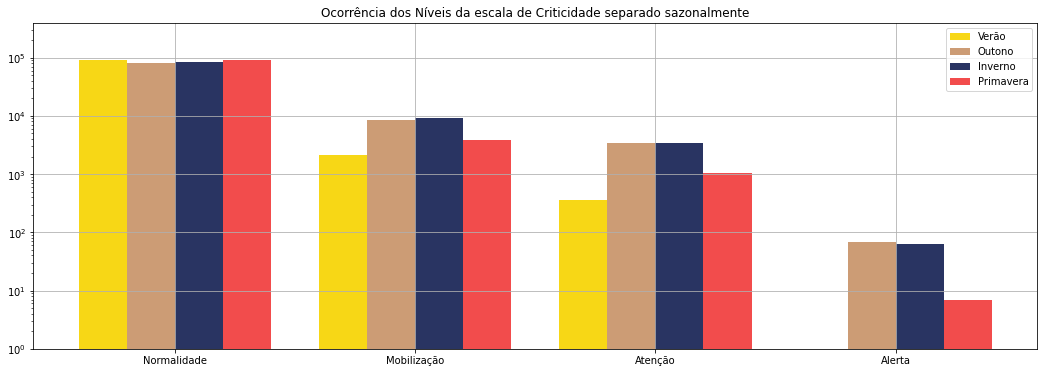

In [67]:
x = ['Normalidade', 'Mobilização', 'Atenção', 'Alerta']
x_axis = np.arange(len(x))

fig, ax = plt.subplots(figsize = (18,6))

ax.bar(x_axis-0.3, niveis_criti_verao_arr, 0.2, label = 'Verão', color='#F7D716')
ax.bar(x_axis-0.1, niveis_criti_outono_arr, 0.2, label = 'Outono', color='#CC9C75')
ax.bar(x_axis+0.1, niveis_criti_inverno_arr, 0.2, label = 'Inverno', color='#293462')
ax.bar(x_axis+0.3, niveis_criti_primavera_arr, 0.2, label = 'Primavera', color='#F24C4C')

ax.set_xticks(x_axis, x)
ax.legend()
ax.grid()
ax.set_yscale('log')
ax.set_ylim(1,10**5.6)
ax.set_title('Ocorrência dos Níveis da escala de Criticidade separado sazonalmente')

plt.savefig(figpath + 'histograma_criti_sazonal.png')

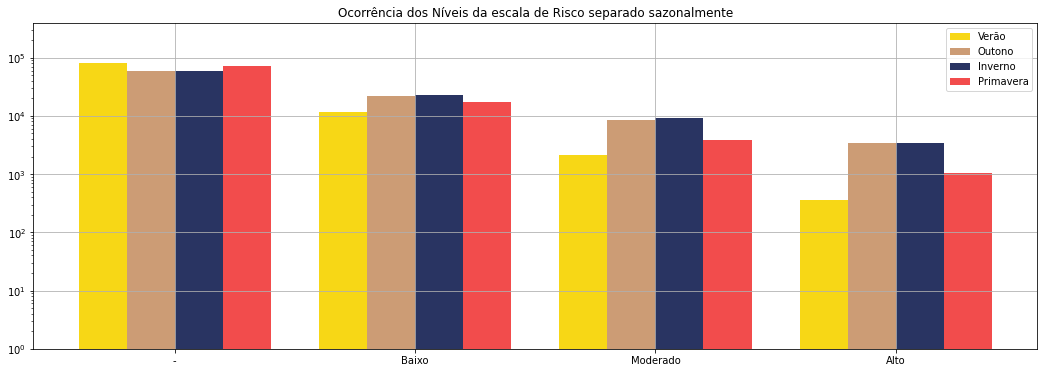

In [68]:
x = ['-', 'Baixo', 'Moderado', 'Alto']
x_axis = np.arange(len(x))

fig, ax = plt.subplots(figsize = (18,6))

ax.bar(x_axis-0.3, niveis_risco_verao_arr, 0.2, label = 'Verão', color='#F7D716')
ax.bar(x_axis-0.1, niveis_risco_outono_arr, 0.2, label = 'Outono', color='#CC9C75')
ax.bar(x_axis+0.1, niveis_risco_inverno_arr, 0.2, label = 'Inverno', color='#293462')
ax.bar(x_axis+0.3, niveis_risco_primavera_arr, 0.2, label = 'Primavera', color='#F24C4C')

ax.set_xticks(x_axis, x)
ax.legend()
ax.grid()
ax.set_yscale('log')
ax.set_ylim(1,10**5.6)
ax.set_title('Ocorrência dos Níveis da escala de Risco separado sazonalmente')

plt.savefig(figpath + 'histograma_risco_sazonal.png')

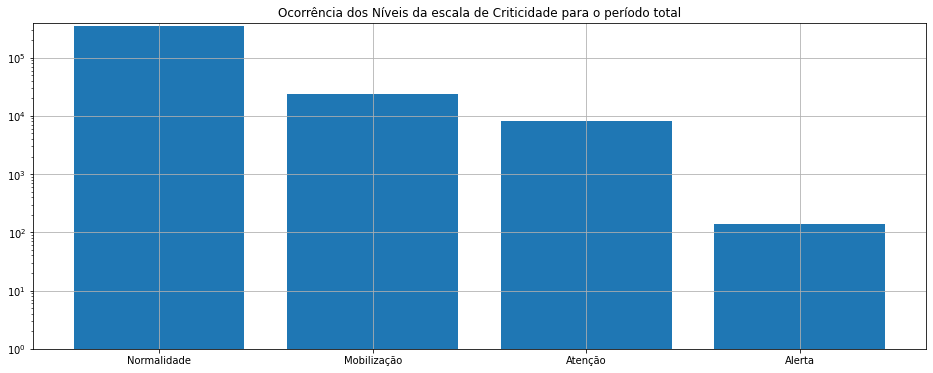

In [28]:
plota_histograma_criti('tudo')

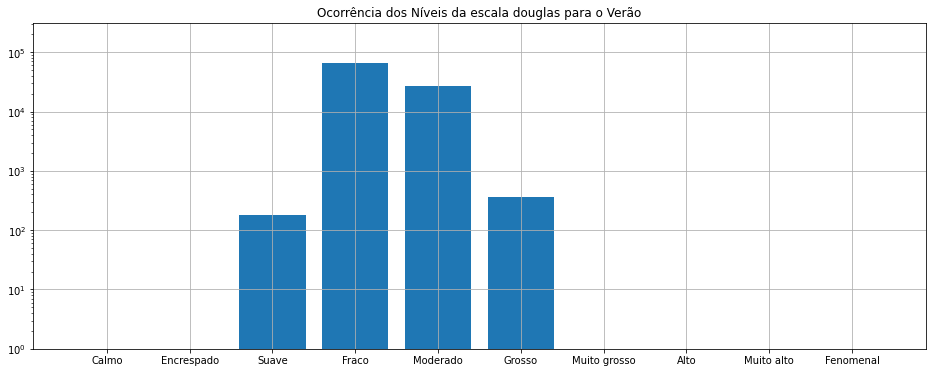

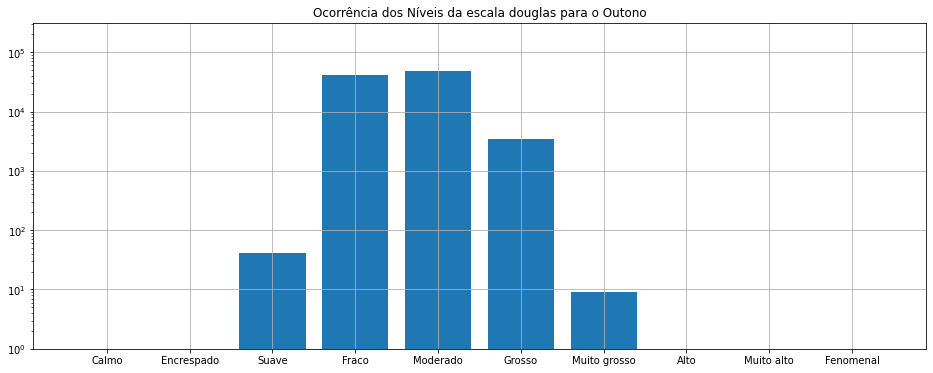

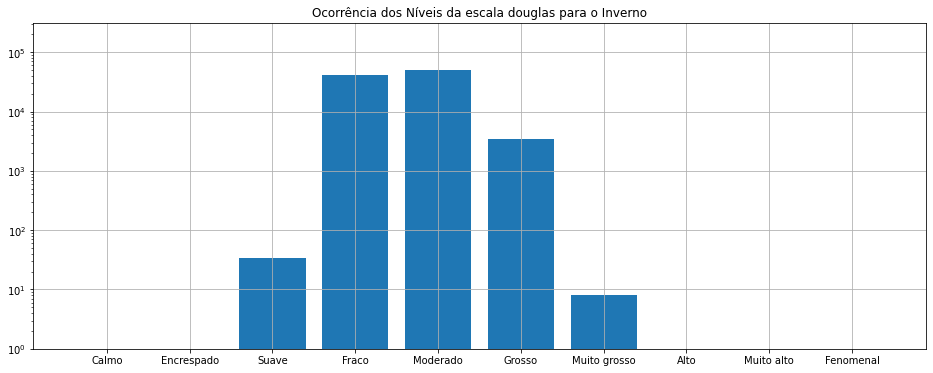

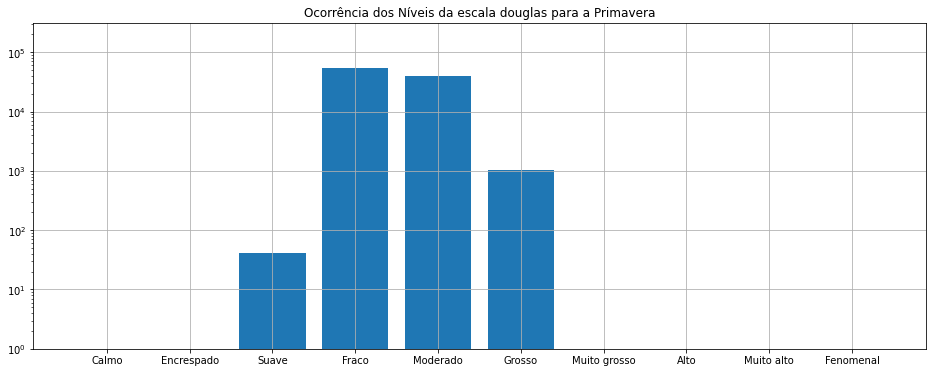

In [29]:
estacoes = ['verao','outono','inverno','primavera']

for estacao in estacoes:
    plota_histograma_douglas(estacao)

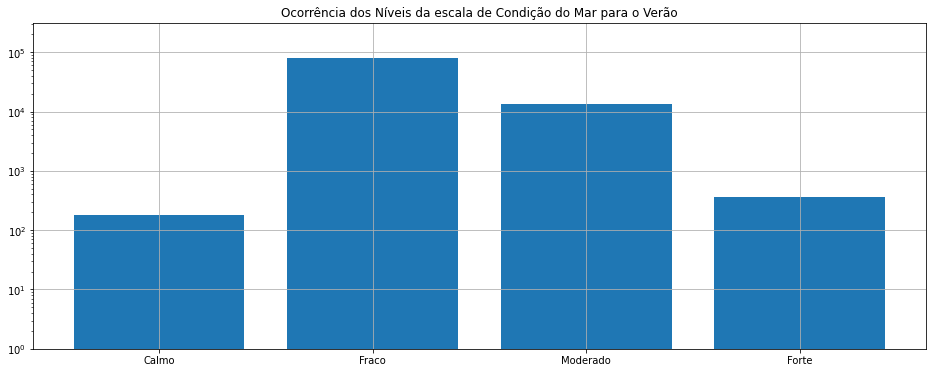

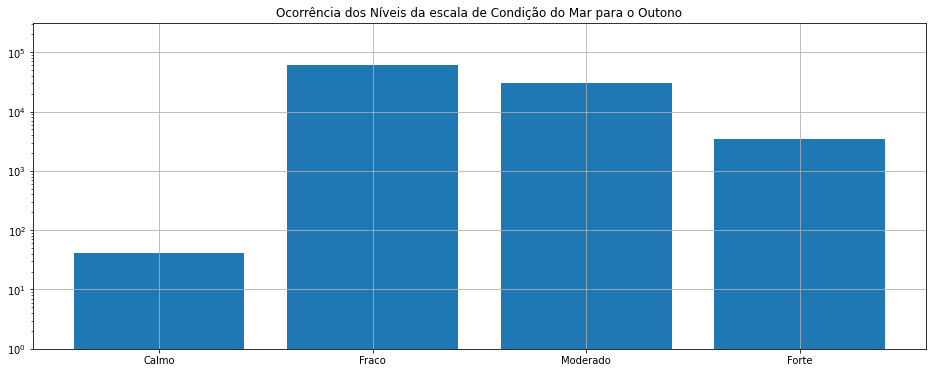

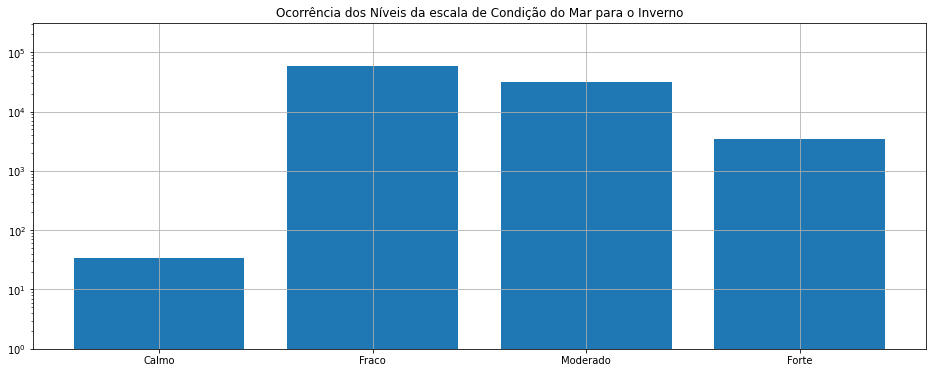

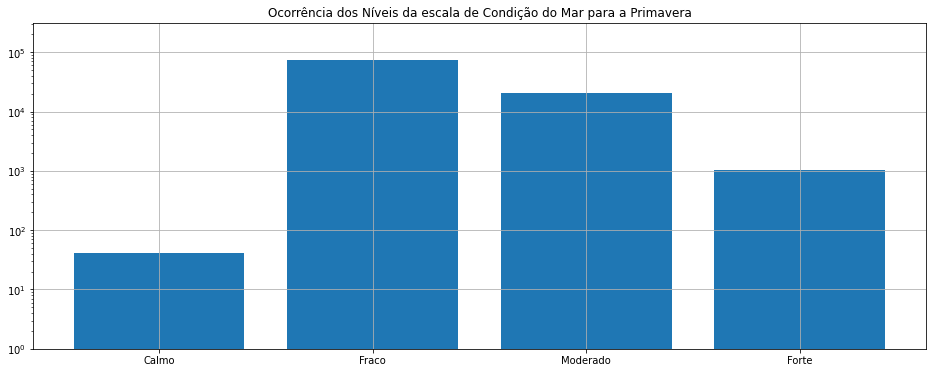

In [30]:
for estacao in estacoes:
    plota_histograma_cond(estacao)

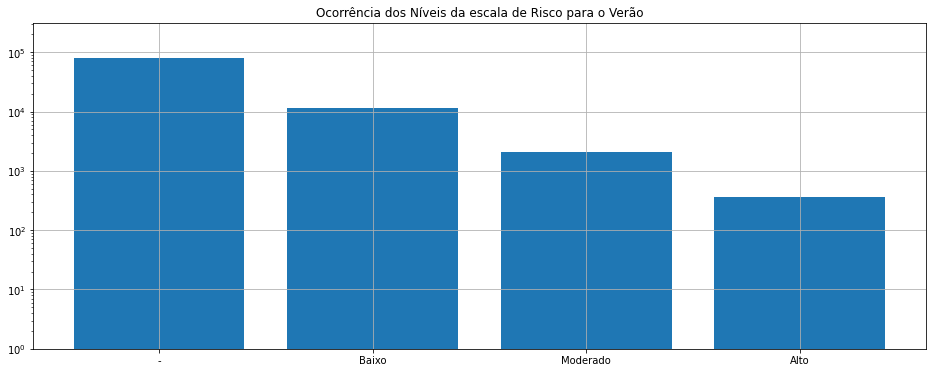

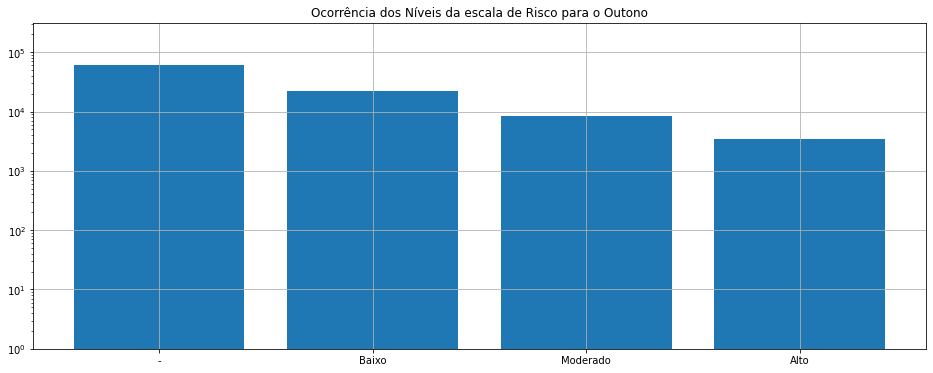

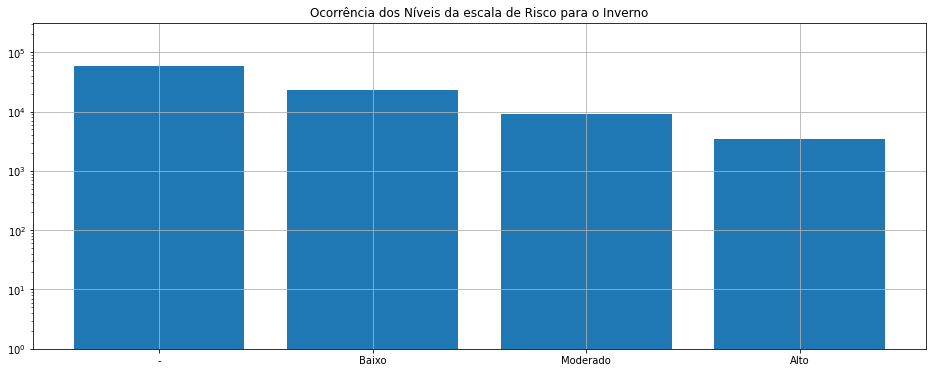

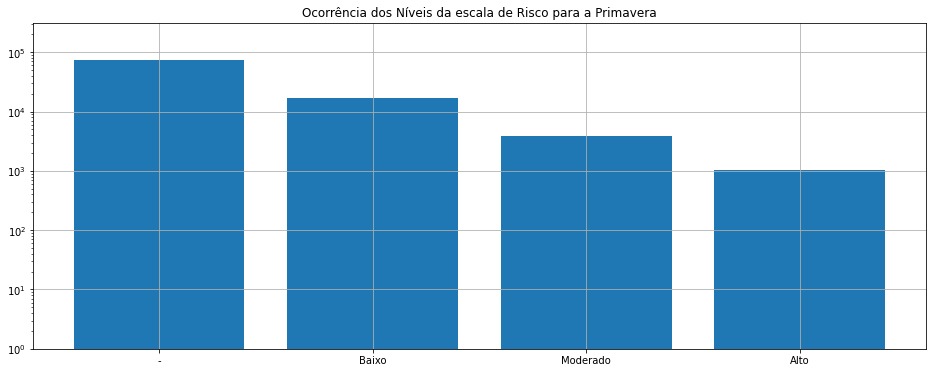

In [31]:
for estacao in estacoes:
    plota_histograma_risco(estacao)

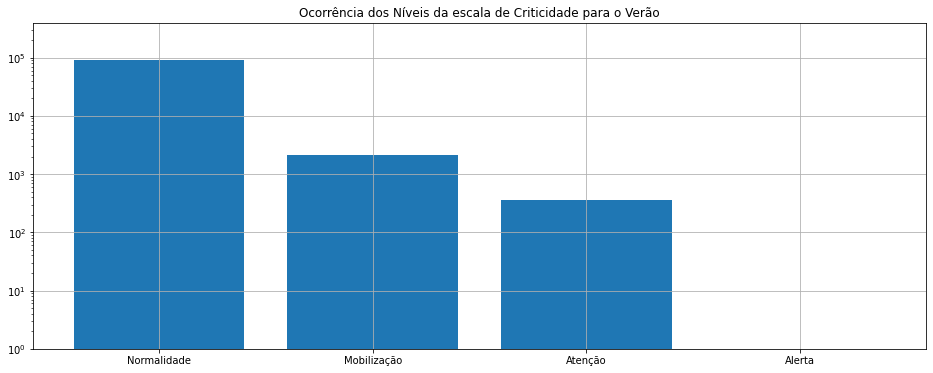

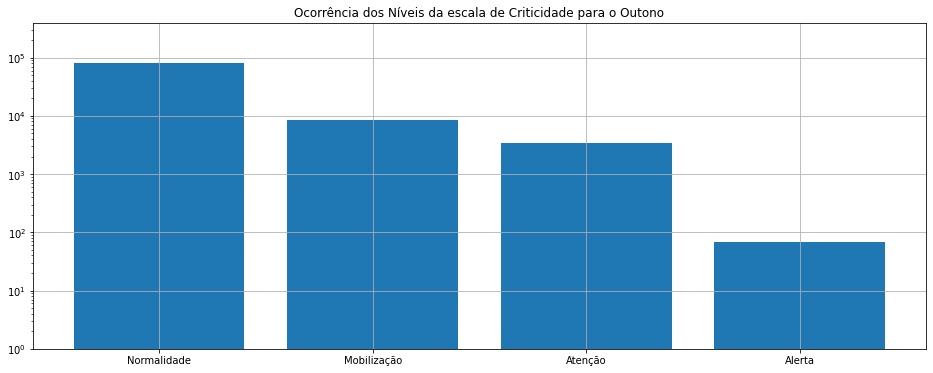

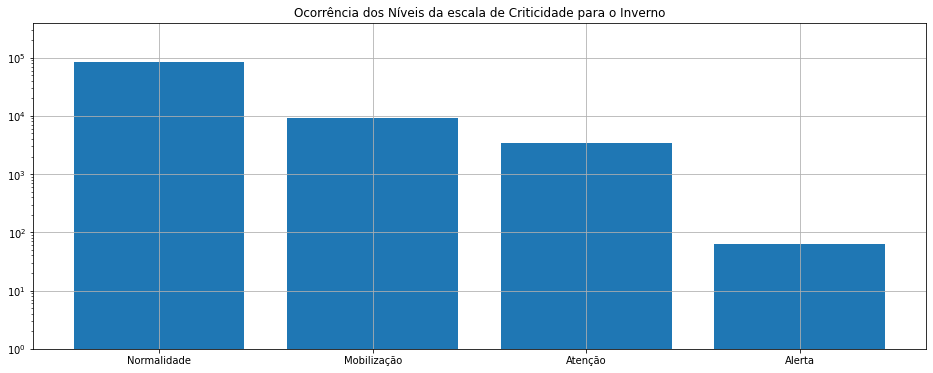

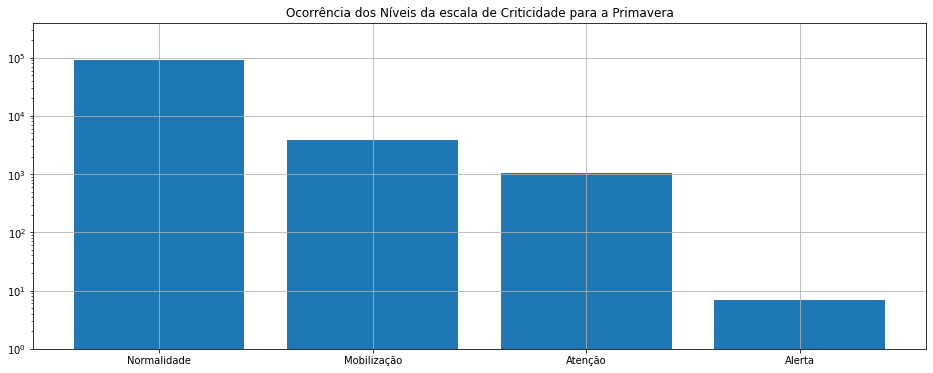

In [32]:
for estacao in estacoes:
    plota_histograma_criti(estacao)

# Plotando evolucao temporal

In [33]:
df_to_plot = df_era.resample('1Y').sum()
del df_to_plot['mwd']
del df_to_plot['pp1d']
del df_to_plot['swh']

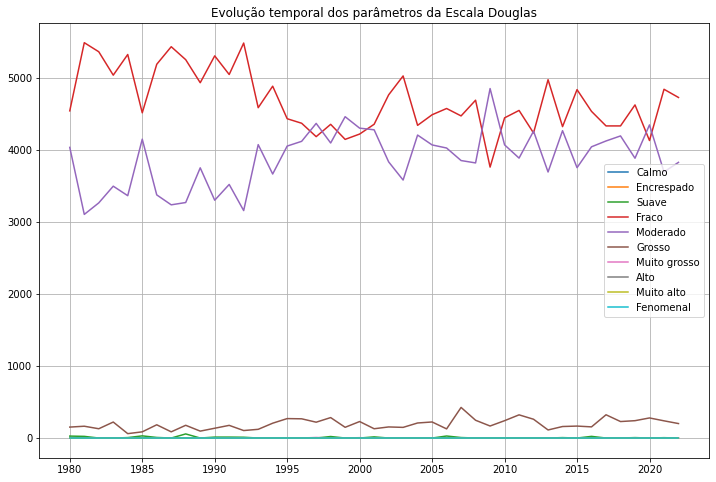

In [34]:
fig = plt.figure(figsize=(12,8))
niveis_douglas = ['Calmo','Encrespado','Suave','Fraco', 'Moderado','Grosso',
         'Muito grosso', 'Alto', 'Muito alto','Fenomenal']

for i,j in zip(df_to_plot.columns[:10], niveis_douglas):
    plt.plot(df_to_plot[i], label = j, linestyle = 'solid')
    
plt.grid()
# plt.yticks(range(0,5000,500))
plt.legend()
plt.title('Evolução temporal dos parâmetros da Escala Douglas')

plt.savefig(figpath + 'evolucao_douglas.png')

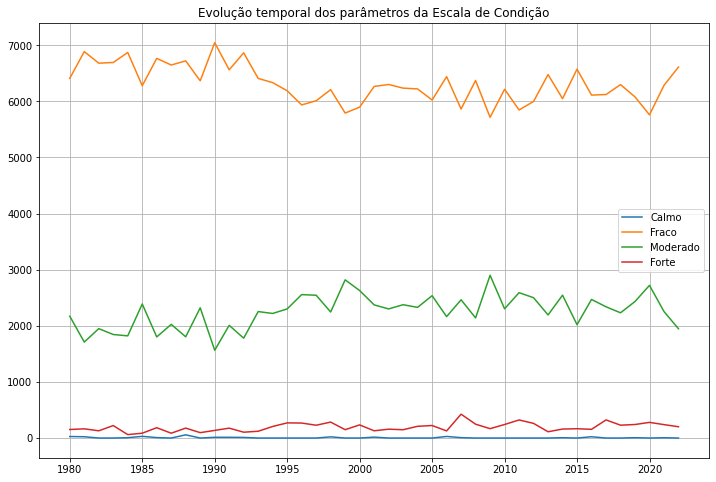

In [35]:
fig = plt.figure(figsize=(12,8))
niveis_cond = ['Calmo','Fraco','Moderado','Forte']

for i,j in zip(df_to_plot.columns[10:14], niveis_cond):
    plt.plot(df_to_plot[i], label = j, linestyle = 'solid')
    
plt.grid()
# plt.yticks(range(0,5000,500))
plt.legend()
plt.title('Evolução temporal dos parâmetros da Escala de Condição')

plt.savefig(figpath + 'evolucao_cond.png')

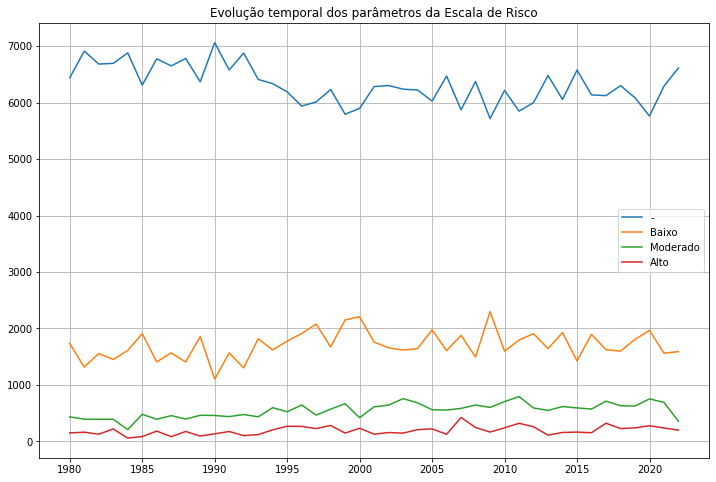

In [36]:
fig = plt.figure(figsize=(12,8))
niveis_risco = ['-', 'Baixo', 'Moderado', 'Alto']

for i,j in zip(df_to_plot.columns[14:18], niveis_risco):
    plt.plot(df_to_plot[i], label = j, linestyle = 'solid')
    
plt.grid()
plt.legend()
plt.title('Evolução temporal dos parâmetros da Escala de Risco')

plt.savefig(figpath + 'evolucao_risco.png')

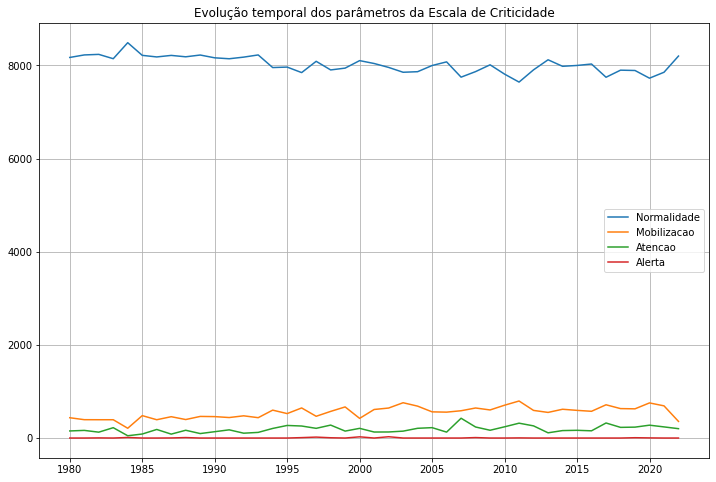

In [37]:
fig = plt.figure(figsize=(12,8))
niveis_criti = ['Normalidade', 'Mobilizacao', 'Atencao', 'Alerta']

for i,j in zip(df_to_plot.columns[18:22], niveis_criti):
    plt.plot(df_to_plot[i], label = j, linestyle = 'solid')
    
plt.grid()
plt.legend()
plt.title('Evolução temporal dos parâmetros da Escala de Criticidade')

plt.savefig(figpath + 'evolucao_criti.png')